# HighRadius PDP( Payment Date Prediction ) Project :

In [1]:
from platform import python_version 
print(python_version())

3.7.7


In [2]:
#importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\HighRadius_ML\ML\H2HBABBA3038.csv');

# Data Pre-processing :

In [4]:
pd.set_option('display.max_columns', 256) # to display all columns
pd.reset_option('all')
pd.options.display.float_format = '{:.0f}'.format # to avoid displaying in exponential foramt
df

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100036292,AMY foundation,2019-04-08 00:00:00,2019,1929027761,2019-03-25,20190325,20190325,20190410,USD,RV,1,NaN,22016,20190325,NA3F,1929027761,0
1,U001,0200772670,ASSOCIAT llc,NaN,2020,1930596037,2020-03-03,20200303,20200303,20200318,USD,RV,1,NaN,922,20200303,NAU5,1930596037,1
2,U001,0200799367,MCL trust,2019-06-05 00:00:00,2019,1929350285,2019-05-20,20190520,20190520,20190604,USD,RV,1,NaN,75935,20190520,NAA8,1929350285,0
3,U001,CCCA02,KRAFT corporation,2019-03-29 00:00:00,2019,1928845192,2019-02-25,20190222,20190225,20190401,USD,RV,1,NaN,15382,20190225,NAG2,1928845192,0
4,U001,0200353024,DECA corp,NaN,2020,1930607011,2020-03-05,20200305,20200305,20200324,USD,RV,1,NaN,27,20200301,NAM4,1930607011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CA02,0140104392,FLANAG associates,NaN,2020,2960626522,2020-04-03,20200403,20200403,20200417,CAD,RV,1,NaN,775,20200407,CA10,2960626522,1
49996,U001,0200726979,BJ'S us,2019-04-26 00:00:00,2019,1929129320,2019-04-11,20190411,20190411,20190426,USD,RV,1,NaN,1128,20190411,NAA8,1929129320,0
49997,CA02,140106408,WAL-M foundation,2019-04-05 00:00:00,2019,2960534372,2019-03-12,20190312,20190312,20190322,CAD,RV,1,NaN,39629,20190312,CA10,2960534372,0
49998,U001,0200418007,AM,2019-08-13 00:00:00,2019,1929633582,2019-07-23,20190718,20190723,20190807,USD,RV,1,NaN,4603,20190723,NAA8,1929633582,0


In [5]:
df.shape

(50000, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [7]:
#DATA PRE-PROCESSING BEGINS !

In [8]:
#delete null columns

In [9]:
df.drop(columns=['area_business'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [11]:
#Time Conversion

In [12]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'],format="%Y%m%d")
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format="%Y%m%d")
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format="%Y%m%d")
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format="%Y%m%d")
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100036292,AMY foundation,2019-04-08,2019,1929027761,2019-03-25,2019-03-25,2019-03-25,2019-04-10,USD,RV,1,22016,2019-03-25,NA3F,1929027761,0
1,U001,0200772670,ASSOCIAT llc,NaT,2020,1930596037,2020-03-03,2020-03-03,2020-03-03,2020-03-18,USD,RV,1,922,2020-03-03,NAU5,1930596037,1
2,U001,0200799367,MCL trust,2019-06-05,2019,1929350285,2019-05-20,2019-05-20,2019-05-20,2019-06-04,USD,RV,1,75935,2019-05-20,NAA8,1929350285,0
3,U001,CCCA02,KRAFT corporation,2019-03-29,2019,1928845192,2019-02-25,2019-02-22,2019-02-25,2019-04-01,USD,RV,1,15382,2019-02-25,NAG2,1928845192,0
4,U001,0200353024,DECA corp,NaT,2020,1930607011,2020-03-05,2020-03-05,2020-03-05,2020-03-24,USD,RV,1,27,2020-03-01,NAM4,1930607011,1


In [13]:
 df.isnull().sum()  # Checking which columns have null values, clear_date and invoice_id

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [14]:
# Dealing with Duplicate columns

In [15]:
df.corr()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
buisness_year,1,-0,NaN,-0,-0,1
doc_id,-0,1,NaN,0,1,-0
posting_id,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0,0,NaN,1,0,0
invoice_id,-0,1,NaN,0,1,-0
isOpen,1,-0,NaN,0,-0,1


In [16]:
# Business_year is similar to isOpen, doc_id is similar to invoice_id
# document_create_date and doucument_create_date.1 seem similar too
comp = np.where(df['doc_id']==df['invoice_id'],1,0)
np.count_nonzero(comp)

49996

In [17]:
#Since invoice_id is a duplicate of doc_id, with 4 elements missing, it won't be needed as a feature. So it can be dropped
#df.drop(columns=['invoice_id'],inplace=True)

In [18]:
#document_create_date (dropping because it is an older version of document_create_date)
df.drop(columns=['document_create_date'],inplace=True)
df.drop_duplicates(keep='first')

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100036292,AMY foundation,2019-04-08,2019,1929027761,2019-03-25,2019-03-25,2019-04-10,USD,RV,1,22016,2019-03-25,NA3F,1929027761,0
1,U001,0200772670,ASSOCIAT llc,NaT,2020,1930596037,2020-03-03,2020-03-03,2020-03-18,USD,RV,1,922,2020-03-03,NAU5,1930596037,1
2,U001,0200799367,MCL trust,2019-06-05,2019,1929350285,2019-05-20,2019-05-20,2019-06-04,USD,RV,1,75935,2019-05-20,NAA8,1929350285,0
3,U001,CCCA02,KRAFT corporation,2019-03-29,2019,1928845192,2019-02-25,2019-02-25,2019-04-01,USD,RV,1,15382,2019-02-25,NAG2,1928845192,0
4,U001,0200353024,DECA corp,NaT,2020,1930607011,2020-03-05,2020-03-05,2020-03-24,USD,RV,1,27,2020-03-01,NAM4,1930607011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CA02,0140104392,FLANAG associates,NaT,2020,2960626522,2020-04-03,2020-04-03,2020-04-17,CAD,RV,1,775,2020-04-07,CA10,2960626522,1
49996,U001,0200726979,BJ'S us,2019-04-26,2019,1929129320,2019-04-11,2019-04-11,2019-04-26,USD,RV,1,1128,2019-04-11,NAA8,1929129320,0
49997,CA02,140106408,WAL-M foundation,2019-04-05,2019,2960534372,2019-03-12,2019-03-12,2019-03-22,CAD,RV,1,39629,2019-03-12,CA10,2960534372,0
49998,U001,0200418007,AM,2019-08-13,2019,1929633582,2019-07-23,2019-07-23,2019-08-07,USD,RV,1,4603,2019-07-23,NAA8,1929633582,0


In [19]:
#removing constant and quasi-constant columns

In [20]:
df.nunique()

business_code                 6
cust_number                1431
name_customer              4261
clear_date                  393
buisness_year                 2
doc_id                    48838
posting_date                500
document_create_date.1      500
due_in_date                 554
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44299
baseline_create_date        504
cust_payment_terms           76
invoice_id                48834
isOpen                        2
dtype: int64

In [21]:
# we see that 'document_type','posting_id' and isOpen have less number of unique variables, 
#so chances of being constant are more.

a=df['document type'].value_counts()
b=df['isOpen'].value_counts()
print(a)
print(b)

RV    49996
X2        4
Name: document type, dtype: int64
0    40000
1    10000
Name: isOpen, dtype: int64


In [22]:
df.drop(columns=['document type','posting_id','isOpen'],inplace=True) 
# isOpen is not important since it is the final output after the payment is made and the model is based on data before 
# that happens.

In [23]:
#removing leading 0 in cust_number
df['cust_number'] = df['cust_number'].apply(lambda x : x[1:] if x.startswith("0") else x)
df['cust_number']

0        100036292
1        200772670
2        200799367
3           CCCA02
4        200353024
           ...    
49995    140104392
49996    200726979
49997    140106408
49998    200418007
49999    200769623
Name: cust_number, Length: 50000, dtype: object

In [24]:
#Normalizing all currency amount to USD

In [25]:
df['invoice_currency'].value_counts()

USD    46108
CAD     3892
Name: invoice_currency, dtype: int64

In [26]:
df.loc[df['invoice_currency'] =="CAD", ['total_open_amount']] = df['total_open_amount']*0.7538 
# conversion from CAD to USD [Average exchange rate from CAD to USD = 0.7538]

In [27]:
# Sorting dataframe according to posting date :

In [28]:
df=df.sort_values(by="posting_date") 

In [29]:
com2=np.where(df['posting_date'] == df['baseline_create_date'], 1, 0)
np.mean(com2) # checking if baseline_crete_date has to be dropped or not according to mean>90

0.89124

In [30]:
df.drop(columns=['document_create_date.1','baseline_create_date','buisness_year'],inplace=True) 
# dropping document_create_date.1 --> not too useful and similar (due to presemce of create_date)
# dropping baseline_create_date  --> not too useful and similar to posting_date
# dropping business_year --> only 1 year data, so is constant

In [31]:
df['total_open_amount'].max()

702254.07

##### DATA PRE-PROCESSING DONE !

----------------------------- 

# Splitting data according to clear date = null or not

In [32]:
X_train = df[df['clear_date'].notnull()].copy()
X_train.shape

(40000, 11)

In [33]:
X_test = df[df['clear_date'].isnull()].copy()
X_test.shape

(10000, 11)

##### Calculating Delay on X_train

In [34]:

#pd.options.mode.chained_assignment = None  # default='warn' Removing false positive warning while using chained assignments

In [35]:
X_train['Delay_y']= (X_train['clear_date'] - X_train['due_in_date']).dt.days

In [36]:
X_train.drop(X_train[X_train['Delay_y']>125].index,inplace=True) # removing outliers

In [37]:
X_train.nunique()

business_code             6
cust_number            1048
name_customer          3957
clear_date              393
doc_id                39101
posting_date            422
due_in_date             491
invoice_currency          2
total_open_amount     35658
cust_payment_terms       73
invoice_id            39097
Delay_y                 173
dtype: int64

## Split X_train into X_loc_train, X_loc_test, X_loc_validate :

In [38]:
from sklearn.model_selection import train_test_split

X_loc_train = X_train[X_train['posting_date'] <= '2019-10-31'].copy()
Y_loc_train = X_loc_train['Delay_y'].copy()

local_test = X_train[X_train['posting_date'] > '2019-10-31'].copy()
X_loc_test = local_test[local_test['posting_date'] <= '2019-12-31'].copy()
Y_loc_test = X_loc_test['Delay_y'].copy()
X_loc_test.drop(columns=['Delay_y'],inplace=True)

X_loc_validate = local_test[local_test['posting_date'] > '2019-12-31'].copy()
Y_loc_validate = X_loc_validate['Delay_y'].copy()
X_loc_validate.drop(columns=['Delay_y'],inplace=True)

#local_test = train_test_split(X_train,train_size=0.7,shuffle=False,random_state=0) #28,000 and 12,000
 
#X_loc_test, X_loc_validate = train_test_split(local_test,train_size=0.5,shuffle=False,random_state=0)# 6000 and 6000

In [39]:
# EDA Time ! ( need to work only on X_loc_train)

In [40]:
X_loc_train.nunique()

business_code             6
cust_number             979
name_customer          3523
clear_date              287
doc_id                29527
posting_date            306
due_in_date             356
invoice_currency          2
total_open_amount     27104
cust_payment_terms       70
invoice_id            29523
Delay_y                 167
dtype: int64

In [41]:
X_loc_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Delay_y
19688,U001,200769623,WAL-MAR co,2019-01-10,1928542178,2018-12-30,2019-01-14,USD,53469,NAH4,1928542178,-4
1477,U001,200786288,FAMILY co,2019-01-11,1928542111,2018-12-30,2019-01-14,USD,3385,NAC6,1928542111,-3
14570,U001,200769623,WAL-MAR systems,2019-01-14,1928535201,2018-12-30,2019-01-14,USD,21795,NAH4,1928535201,0
2644,U001,200101621,TRA us,2019-01-25,1928534356,2018-12-30,2019-01-14,USD,47020,NAA8,1928534356,11
28718,U001,200769623,WAL-MAR foundation,2019-01-11,1928542953,2018-12-30,2019-01-14,USD,8653,NAH4,1928542953,-3
...,...,...,...,...,...,...,...,...,...,...,...,...
49404,U001,200762301,C&S WH trust,2019-11-15,1930077316,2019-10-31,2019-11-15,USD,93636,NAC6,1930077316,0
33460,U001,200966888,BIRD-I systems,2019-11-13,1930077540,2019-10-31,2019-11-10,USD,4884,NA10,1930077540,3
47592,U001,200748108,KROGER trust,2019-12-10,1930070458,2019-10-31,2019-12-10,USD,30288,NAWU,1930070458,0
10646,U001,200777735,NASH foundation,2019-11-15,1930066555,2019-10-31,2019-11-15,USD,56594,NAA8,1930066555,0


In [42]:
X_loc_test

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
1109,U001,200707822,PUBLI foundation,2019-11-18,1930091632,2019-11-01,2019-11-16,USD,90651,NAA8,1930091632
3371,U001,200769623,WAL-MAR in,2019-11-20,1930077130,2019-11-01,2019-11-16,USD,4012,NAH4,1930077130
31048,U001,200769623,WAL-MAR systems,2019-11-15,1930086345,2019-11-01,2019-11-16,USD,36347,NAH4,1930086345
24091,U001,200704858,WAKE co,2019-11-22,1930078345,2019-11-01,2019-11-16,USD,7633,NAA8,1930078345
1828,U001,200782669,SYGMA corp,2019-11-18,1930072136,2019-11-01,2019-11-16,USD,29404,NAA8,1930072136
...,...,...,...,...,...,...,...,...,...,...,...
4074,U001,200744019,TARG trust,2020-01-15,1930332236,2019-12-31,2020-01-15,USD,49817,NAA8,1930332236
28624,U001,200718130,SYSCO F,2020-01-16,1930339893,2019-12-31,2020-01-15,USD,10524,NAA8,1930339893
26979,U001,200726979,BJ'S in,2020-01-15,1930336933,2019-12-31,2020-01-15,USD,295,NAA8,1930336933
40943,U001,100004536,BAS corporation,2020-01-14,1930318746,2019-12-31,2020-01-15,USD,4000,NAA8,1930318746


In [43]:
X_loc_validate

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
40369,U001,200726979,BJ'S systems,2020-01-17,1930339899,2020-01-01,2020-01-16,USD,223,NAA8,1930339899
36574,U001,100031704,DELHAIZE co,2020-01-22,1930338628,2020-01-01,2020-01-16,USD,118168,NAA8,1930338628
15554,U001,200799367,MCL corporation,2020-01-17,1930342818,2020-01-01,2020-01-16,USD,30772,NAA8,1930342818
22869,U001,200769623,WAL-MAR corporation,2020-01-14,1930336770,2020-01-01,2020-01-16,USD,36041,NAH4,1930336770
17864,U001,CCU002,KRFT FDS llc,2020-02-28,1930330023,2020-01-01,2020-02-05,USD,12004,NAG2,1930330023
...,...,...,...,...,...,...,...,...,...,...,...
31118,U001,200759878,SA associates,2020-03-13,1930572342,2020-02-27,2020-03-13,USD,3396,NAH4,1930572342
32774,U001,200762950,HAR systems,2020-03-13,1930579041,2020-02-27,2020-03-13,USD,17378,NAA8,1930579041
32963,U001,200794332,COST trust,2020-03-12,1930576874,2020-02-27,2020-03-13,USD,38586,NAAX,1930576874
45529,U001,200759878,SA us,2020-03-13,1930573895,2020-02-27,2020-03-13,USD,16221,NAH4,1930573895


 ------------------------------------------------------------------------------------------------------------

# EDA : 
( working only on X_loc_train )

In [44]:
#importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Analysing delay with other columns

<AxesSubplot:xlabel='Delay_y', ylabel='Density'>

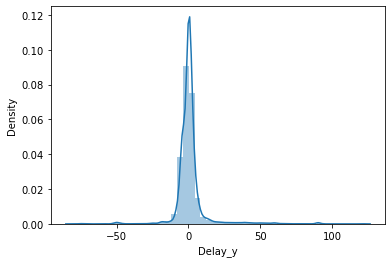

In [46]:
#distplot

sns.distplot(X_loc_train["Delay_y"]) # here we see it is right skewed and so it has outliers

In [47]:
X_loc_train['post_month']=X_loc_train['posting_date'].dt.month
X_loc_train['due_month']=X_loc_train['due_in_date'].dt.month
X_loc_train['post_day']=X_loc_train['posting_date'].dt.day
X_loc_train['due_day']=X_loc_train['due_in_date'].dt.day
X_loc_train['post_quarter']=X_loc_train['posting_date'].dt.quarter
X_loc_train['due_quarter']=X_loc_train['due_in_date'].dt.quarter

#end of month
#middle of month use np.where

In [48]:
X_loc_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Delay_y,post_month,due_month,post_day,due_day,post_quarter,due_quarter
19688,U001,200769623,WAL-MAR co,2019-01-10,1928542178,2018-12-30,2019-01-14,USD,53469,NAH4,1928542178,-4,12,1,30,14,4,1
1477,U001,200786288,FAMILY co,2019-01-11,1928542111,2018-12-30,2019-01-14,USD,3385,NAC6,1928542111,-3,12,1,30,14,4,1
14570,U001,200769623,WAL-MAR systems,2019-01-14,1928535201,2018-12-30,2019-01-14,USD,21795,NAH4,1928535201,0,12,1,30,14,4,1
2644,U001,200101621,TRA us,2019-01-25,1928534356,2018-12-30,2019-01-14,USD,47020,NAA8,1928534356,11,12,1,30,14,4,1
28718,U001,200769623,WAL-MAR foundation,2019-01-11,1928542953,2018-12-30,2019-01-14,USD,8653,NAH4,1928542953,-3,12,1,30,14,4,1


<AxesSubplot:xlabel='Delay_y'>

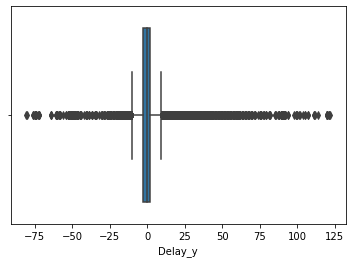

In [49]:
sns.boxplot(X_loc_train.Delay_y)

In [50]:
X_loc_train.quantile(0.25)

doc_id              1929030711
total_open_amount         4457
invoice_id          1929030688
Delay_y                     -3
post_month                   3
due_month                    4
post_day                     8
due_day                      8
post_quarter                 1
due_quarter                  2
Name: 0.25, dtype: float64

In [51]:
IQR= 5
up= 2+IQR*3
up

17

In [52]:
#filtering outliers based on boxplot above before splitting of data


In [53]:
# make bar plots for categorical values

<AxesSubplot:xlabel='post_month', ylabel='Delay_y'>

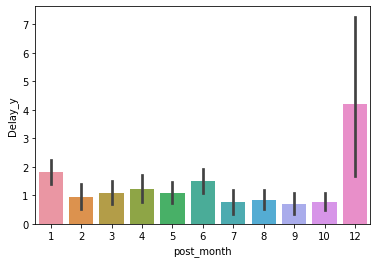

In [54]:
sns.barplot( x="post_month", y="Delay_y",data=X_loc_train) # we see here that in December, there is more Delay

<AxesSubplot:xlabel='post_month', ylabel='Delay_y'>

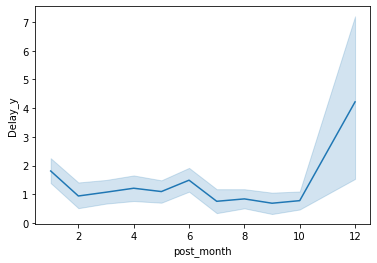

In [55]:
sns.lineplot(x="post_month", y="Delay_y", data=X_loc_train)
#Due to seasonal variance,Delay is more if invoice is posted at the end of the year 

<AxesSubplot:xlabel='due_in_date', ylabel='Delay_y'>

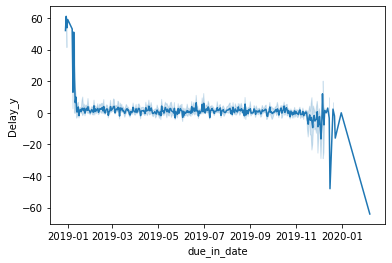

In [56]:
sns.lineplot(x="due_in_date", y="Delay_y", data=X_loc_train)# Dues are cleared faster at the end of the year
# as the year progresses, the delay during each month decreases,so it has a linear relation

In [57]:
#create bins according to quantiles for amount and then compare
#X_loc_train['amount_bin'],bin_edges = pd.qcut(X_loc_train['total_open_amount'], q=10,labels=False,retbins=True)
cut_bins=[0,800,3000,7000,13000,17000,25000,35000,55000,80000,200000,400000,650000,750000]
X_loc_train['amount_bin'],bin_edges = pd.cut(X_loc_train['total_open_amount'], bins=cut_bins, labels=False,retbins=True)
bin_edges= pd.Series(bin_edges)
bin_edges

0          0
1        800
2       3000
3       7000
4      13000
5      17000
6      25000
7      35000
8      55000
9      80000
10    200000
11    400000
12    650000
13    750000
dtype: int32

<AxesSubplot:xlabel='amount_bin', ylabel='Delay_y'>

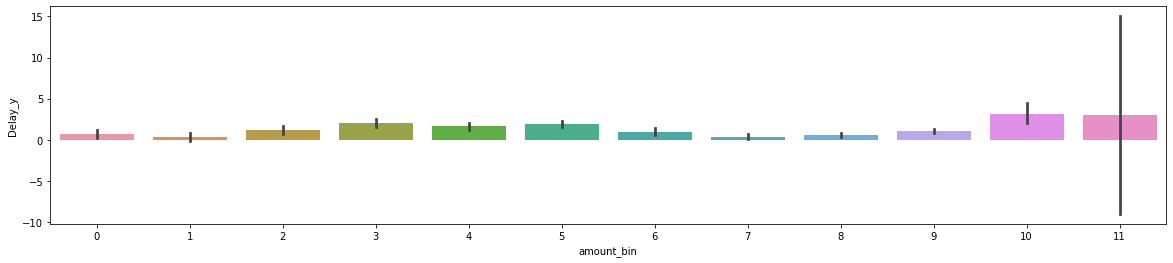

In [58]:
# average delay for invoice amounts , average delay is more for the amount in the range (16500,24200)
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(x="amount_bin", y="Delay_y", ax=ax, data=X_loc_train)

In [59]:
X_loc_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Delay_y,post_month,due_month,post_day,due_day,post_quarter,due_quarter,amount_bin
19688,U001,200769623,WAL-MAR co,2019-01-10,1928542178,2018-12-30,2019-01-14,USD,53469,NAH4,1928542178,-4,12,1,30,14,4,1,7
1477,U001,200786288,FAMILY co,2019-01-11,1928542111,2018-12-30,2019-01-14,USD,3385,NAC6,1928542111,-3,12,1,30,14,4,1,2
14570,U001,200769623,WAL-MAR systems,2019-01-14,1928535201,2018-12-30,2019-01-14,USD,21795,NAH4,1928535201,0,12,1,30,14,4,1,5
2644,U001,200101621,TRA us,2019-01-25,1928534356,2018-12-30,2019-01-14,USD,47020,NAA8,1928534356,11,12,1,30,14,4,1,7
28718,U001,200769623,WAL-MAR foundation,2019-01-11,1928542953,2018-12-30,2019-01-14,USD,8653,NAH4,1928542953,-3,12,1,30,14,4,1,3


##### EDA Done !

--------------------------------------------------------------

# Feature Engineering :

Here, encoding, feature extraction from datetime, binning and such techniques will be used to make new features.\
Some features were already made during EDA. ( like months and amount_bin)

In [60]:
#will check the correlation and realtion to delay in feature selection

In [61]:
from sklearn.preprocessing import LabelEncoder

# label encode business_code,invoice_currency, cust_number, cust_payment_terms

business_code_encoder= LabelEncoder()
business_code_encoder.fit(X_loc_train['business_code'])
X_loc_train['business_enc'] = business_code_encoder.transform(X_loc_train['business_code'])

currency_encoder=LabelEncoder()
currency_encoder.fit(X_loc_train['invoice_currency'])
X_loc_train['currency_enc'] = currency_encoder.transform(X_loc_train['invoice_currency'])

cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_loc_train['cust_number'])
X_loc_train['cust_number_enc'] = cust_number_encoder.transform(X_loc_train['cust_number'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_loc_train['cust_payment_terms'])
X_loc_train['cust_terms_enc'] = cust_payment_terms_encoder.transform(X_loc_train['cust_payment_terms'])



In [62]:
#Due date could tell us if the delay is more if due is in the beginning, middle or end of the month
# due_date end (1 and 0) 
due_month_end=np.where(X_loc_train['due_day']>23,1,0)
X_loc_train['due_month_end']=due_month_end

# due_date first half (1 and 0)
due_month_begin=np.where(X_loc_train['due_day']<8,1,0)
X_loc_train['due_month_begin']=due_month_begin

# due_date middle (1 and 0) 
due_month_middle=np.where((X_loc_train['due_day']>7) & (X_loc_train['due_day']<24),1,0)
X_loc_train['due_month_middle']=due_month_middle


In [63]:
X_loc_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,...,post_quarter,due_quarter,amount_bin,business_enc,currency_enc,cust_number_enc,cust_terms_enc,due_month_end,due_month_begin,due_month_middle
19688,U001,200769623,WAL-MAR co,2019-01-10,1928542178,2018-12-30,2019-01-14,USD,53469,NAH4,...,4,1,7,1,1,803,35,0,0,1
1477,U001,200786288,FAMILY co,2019-01-11,1928542111,2018-12-30,2019-01-14,USD,3385,NAC6,...,4,1,2,1,1,847,27,0,0,1
14570,U001,200769623,WAL-MAR systems,2019-01-14,1928535201,2018-12-30,2019-01-14,USD,21795,NAH4,...,4,1,5,1,1,803,35,0,0,1
2644,U001,200101621,TRA us,2019-01-25,1928534356,2018-12-30,2019-01-14,USD,47020,NAA8,...,4,1,7,1,1,458,21,0,0,1
28718,U001,200769623,WAL-MAR foundation,2019-01-11,1928542953,2018-12-30,2019-01-14,USD,8653,NAH4,...,4,1,3,1,1,803,35,0,0,1


In [64]:
# Average payment term :difference between clear and post dates (check unique values) and find average based on companies
X_loc_train['buffer']= (X_train['due_in_date'] - X_train['posting_date']).dt.days
X_loc_train['ave_buffer']=X_loc_train.groupby(['name_customer'])['buffer'].transform('mean')

 ---------------------------

#  Feature Selection :

In [65]:
#dropping object,datetime and less correlated columns
X_loc_train.drop(columns=['name_customer','business_code','invoice_currency','buffer','cust_number',
                          'cust_payment_terms','posting_date','due_in_date','total_open_amount','clear_date'],inplace=True) #,'doc_id' 
X_loc_train.head()

,doc_id,invoice_id,Delay_y,post_month,due_month,post_day,due_day,post_quarter,due_quarter,amount_bin,business_enc,currency_enc,cust_number_enc,cust_terms_enc,due_month_end,due_month_begin,due_month_middle,ave_buffer
19688,1928542178,1928542178,-4,12,1,30,14,4,1,7,1,1,803,35,0,0,1,15
1477,1928542111,1928542111,-3,12,1,30,14,4,1,2,1,1,847,27,0,0,1,15
14570,1928535201,1928535201,0,12,1,30,14,4,1,5,1,1,803,35,0,0,1,15
2644,1928534356,1928534356,11,12,1,30,14,4,1,7,1,1,458,21,0,0,1,15
28718,1928542953,1928542953,-3,12,1,30,14,4,1,3,1,1,803,35,0,0,1,15


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

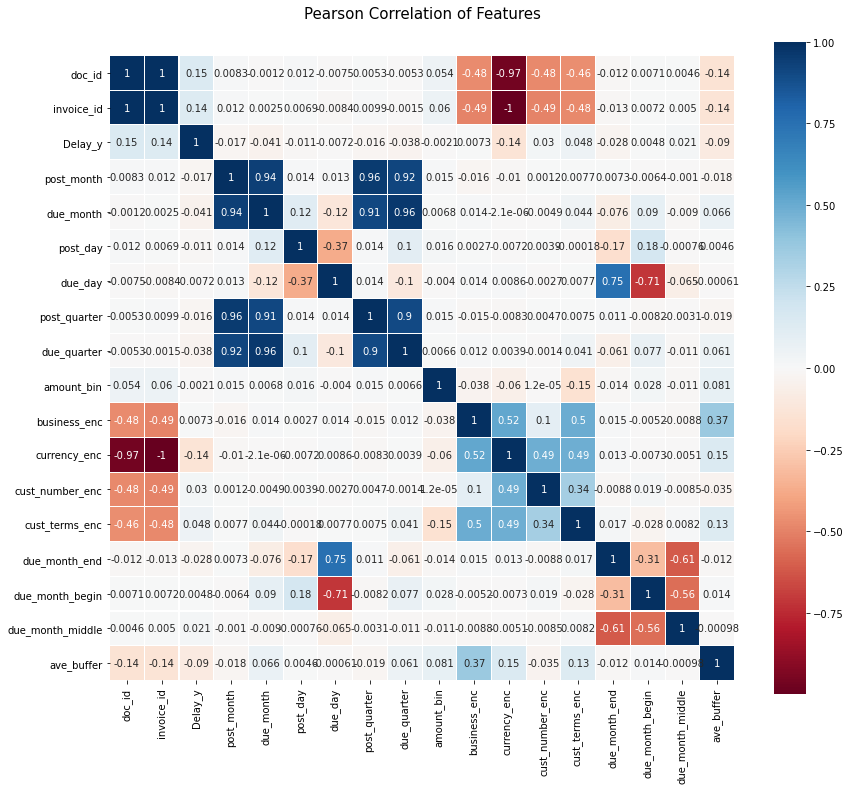

In [66]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_loc_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [67]:
# In the above heat map we see the correlation between Target variable ( Delay_y ) and the other features made

In [68]:
X_loc_train.drop(columns=['Delay_y'],inplace=True)

### Mapping columns to local validation set, local test set and Final test set

In [69]:
X_loc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30210 entries, 19688 to 23558
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   doc_id            30210 non-null  float64
 1   invoice_id        30206 non-null  float64
 2   post_month        30210 non-null  int64  
 3   due_month         30210 non-null  int64  
 4   post_day          30210 non-null  int64  
 5   due_day           30210 non-null  int64  
 6   post_quarter      30210 non-null  int64  
 7   due_quarter       30210 non-null  int64  
 8   amount_bin        30210 non-null  int64  
 9   business_enc      30210 non-null  int32  
 10  currency_enc      30210 non-null  int32  
 11  cust_number_enc   30210 non-null  int32  
 12  cust_terms_enc    30210 non-null  int32  
 13  due_month_end     30210 non-null  int32  
 14  due_month_begin   30210 non-null  int32  
 15  due_month_middle  30210 non-null  int32  
 16  ave_buffer        30210 non-null  fl

In [70]:
X_loc_validate.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
40369,U001,200726979,BJ'S systems,2020-01-17,1930339899,2020-01-01,2020-01-16,USD,223,NAA8,1930339899
36574,U001,100031704,DELHAIZE co,2020-01-22,1930338628,2020-01-01,2020-01-16,USD,118168,NAA8,1930338628
15554,U001,200799367,MCL corporation,2020-01-17,1930342818,2020-01-01,2020-01-16,USD,30772,NAA8,1930342818
22869,U001,200769623,WAL-MAR corporation,2020-01-14,1930336770,2020-01-01,2020-01-16,USD,36041,NAH4,1930336770
17864,U001,CCU002,KRFT FDS llc,2020-02-28,1930330023,2020-01-01,2020-02-05,USD,12004,NAG2,1930330023


In [71]:
# local validation set
X_loc_validate['post_month']=X_loc_validate['posting_date'].dt.month
X_loc_validate['due_month']=X_loc_validate['due_in_date'].dt.month
X_loc_validate['post_quarter']=X_loc_validate['posting_date'].dt.quarter
X_loc_validate['due_quarter']=X_loc_validate['due_in_date'].dt.quarter
X_loc_validate['post_day']=X_loc_validate['posting_date'].dt.day
X_loc_validate['due_day']=X_loc_validate['due_in_date'].dt.day

#####################

X_loc_validate['amount_bin']= pd.cut(X_loc_validate['total_open_amount'], bins=cut_bins, labels=False)

#####################

X_loc_validate['currency_enc'] = currency_encoder.transform(X_loc_validate['invoice_currency'])

#encoding only those variables which were present in X_lox_train
X_loc_validate['business_code'] = X_loc_validate['business_code'].map(lambda s:'<unknown>' if s not in business_code_encoder.classes_ 
                                                                  else s)
business_code_encoder.classes_=np.append(business_code_encoder.classes_,'<unknown>')
X_loc_validate['business_enc'] = business_code_encoder.transform(X_loc_validate['business_code'])

#encoding only those variables which were present in X_lox_train
X_loc_validate['cust_number'] = X_loc_validate['cust_number'].map(lambda s:'<unknown>' if s not in cust_number_encoder.classes_ 
                                                                  else s)
cust_number_encoder.classes_=np.append(cust_number_encoder.classes_,'<unknown>')
X_loc_validate['cust_number_enc'] = cust_number_encoder.transform(X_loc_validate['cust_number'])

#encoding only those variables which were present in X_lox_train
X_loc_validate['cust_payment_terms'] = X_loc_validate['cust_payment_terms'].map(lambda s:'<unknown>' if s not in 
                                                                                cust_payment_terms_encoder.classes_ else s)
cust_payment_terms_encoder.classes_=np.append(cust_payment_terms_encoder.classes_,'<unknown>')
X_loc_validate['cust_terms_enc'] = cust_payment_terms_encoder.transform(X_loc_validate['cust_payment_terms'])

#####################

due_month_end=np.where(X_loc_validate['due_day']>23,1,0)
X_loc_validate['due_month_end']=due_month_end
due_month_begin=np.where(X_loc_validate['due_day']<8,1,0)
X_loc_validate['due_month_begin']=due_month_begin
due_month_middle=np.where((X_loc_validate['due_day']>7) & (X_loc_validate['due_day']<24),1,0)
X_loc_validate['due_month_middle']=due_month_middle

#####################

X_loc_validate['buffer']= (X_loc_validate['due_in_date'] - X_loc_validate['posting_date']).dt.days
X_loc_validate['ave_buffer']=X_loc_validate.groupby(['name_customer'])['buffer'].transform('mean')

#dropping object,datetime and less correlated columns
X_loc_validate.drop(columns=['name_customer','business_code','total_open_amount','invoice_currency','buffer','cust_number',
                             'cust_payment_terms','posting_date','due_in_date','clear_date'],inplace=True) #,'doc_id'

X_loc_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5065 entries, 40369 to 48776
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   doc_id            5065 non-null   float64
 1   invoice_id        5065 non-null   float64
 2   post_month        5065 non-null   int64  
 3   due_month         5065 non-null   int64  
 4   post_quarter      5065 non-null   int64  
 5   due_quarter       5065 non-null   int64  
 6   post_day          5065 non-null   int64  
 7   due_day           5065 non-null   int64  
 8   amount_bin        5065 non-null   int64  
 9   currency_enc      5065 non-null   int32  
 10  business_enc      5065 non-null   int32  
 11  cust_number_enc   5065 non-null   int32  
 12  cust_terms_enc    5065 non-null   int32  
 13  due_month_end     5065 non-null   int32  
 14  due_month_begin   5065 non-null   int32  
 15  due_month_middle  5065 non-null   int32  
 16  ave_buffer        5065 non-null   flo

In [72]:
#local test set
X_loc_test['post_month']=X_loc_test['posting_date'].dt.month
X_loc_test['due_month']=X_loc_test['due_in_date'].dt.month
X_loc_test['post_quarter']=X_loc_test['posting_date'].dt.quarter
X_loc_test['due_quarter']=X_loc_test['due_in_date'].dt.quarter
X_loc_test['post_day']=X_loc_test['posting_date'].dt.day
X_loc_test['due_day']=X_loc_test['due_in_date'].dt.day

#####################

X_loc_test['amount_bin']= pd.cut(X_loc_test['total_open_amount'], bins=cut_bins, labels=False)

#####################

X_loc_test['currency_enc'] = currency_encoder.transform(X_loc_test['invoice_currency'])

X_loc_test['business_code'] = X_loc_test['business_code'].map(lambda s:'<unknown>' if s not in business_code_encoder.classes_ 
                                                                  else s)
business_code_encoder.classes_=np.append(business_code_encoder.classes_,'<unknown>')
X_loc_test['business_enc'] = business_code_encoder.transform(X_loc_test['business_code'])

X_loc_test['cust_number'] = X_loc_test['cust_number'].map(lambda s:'<unknown>' if s not in cust_number_encoder.classes_ 
                                                                  else s)
cust_number_encoder.classes_=np.append(cust_number_encoder.classes_,'<unknown>')
X_loc_test['cust_number_enc'] = cust_number_encoder.transform(X_loc_test['cust_number'])

X_loc_test['cust_payment_terms'] = X_loc_test['cust_payment_terms'].map(lambda s:'<unknown>' if s not in 
                                                                                cust_payment_terms_encoder.classes_ else s)
cust_payment_terms_encoder.classes_=np.append(cust_payment_terms_encoder.classes_,'<unknown>')
X_loc_test['cust_terms_enc'] = cust_payment_terms_encoder.transform(X_loc_test['cust_payment_terms'])

#####################

due_month_end=np.where(X_loc_test['due_day']>23,1,0)
X_loc_test['due_month_end']=due_month_end
due_month_begin=np.where(X_loc_test['due_day']<8,1,0)
X_loc_test['due_month_begin']=due_month_begin
due_month_middle=np.where((X_loc_test['due_day']>7) & (X_loc_test['due_day']<24),1,0)
X_loc_test['due_month_middle']=due_month_middle

#####################

X_loc_test['buffer']= (X_loc_test['due_in_date'] - X_loc_test['posting_date']).dt.days
X_loc_test['ave_buffer']=X_loc_test.groupby(['name_customer'])['buffer'].transform('mean')

#dropping object,datetime and less correlated columns
X_loc_test.drop(columns=['name_customer','business_code','total_open_amount','invoice_currency','buffer','cust_number',
                         'cust_payment_terms','posting_date','due_in_date','clear_date'],inplace=True)#,'doc_id'

X_loc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 1109 to 12011
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   doc_id            4718 non-null   float64
 1   invoice_id        4718 non-null   float64
 2   post_month        4718 non-null   int64  
 3   due_month         4718 non-null   int64  
 4   post_quarter      4718 non-null   int64  
 5   due_quarter       4718 non-null   int64  
 6   post_day          4718 non-null   int64  
 7   due_day           4718 non-null   int64  
 8   amount_bin        4718 non-null   int64  
 9   currency_enc      4718 non-null   int32  
 10  business_enc      4718 non-null   int32  
 11  cust_number_enc   4718 non-null   int32  
 12  cust_terms_enc    4718 non-null   int32  
 13  due_month_end     4718 non-null   int32  
 14  due_month_begin   4718 non-null   int32  
 15  due_month_middle  4718 non-null   int32  
 16  ave_buffer        4718 non-null   floa

In [73]:
# Main test set

X_main_test = X_test.copy()

X_main_test['post_month']=X_main_test['posting_date'].dt.month
X_main_test['due_month']=X_main_test['due_in_date'].dt.month
X_main_test['post_quarter']=X_main_test['posting_date'].dt.quarter
X_main_test['due_quarter']=X_main_test['due_in_date'].dt.quarter
X_main_test['post_day']=X_main_test['posting_date'].dt.day
X_main_test['due_day']=X_main_test['due_in_date'].dt.day

#####################

X_main_test['amount_bin']= pd.cut(X_main_test['total_open_amount'], bins=cut_bins, labels=False)

#####################

X_main_test['currency_enc'] = currency_encoder.transform(X_main_test['invoice_currency'])

X_main_test['business_code'] = X_main_test['business_code'].map(lambda s:'<unknown>' if s not in business_code_encoder.classes_ 
                                                                  else s)
business_code_encoder.classes_=np.append(business_code_encoder.classes_,'<unknown>')
X_main_test['business_enc'] = business_code_encoder.transform(X_main_test['business_code'])

X_main_test['cust_number'] = X_main_test['cust_number'].map(lambda s:'<unknown>' if s not in cust_number_encoder.classes_ 
                                                                  else s)
cust_number_encoder.classes_=np.append(cust_number_encoder.classes_,'<unknown>')
X_main_test['cust_number_enc'] = cust_number_encoder.transform(X_main_test['cust_number'])

X_main_test['cust_payment_terms'] = X_main_test['cust_payment_terms'].map(lambda s:'<unknown>' if s not in 
                                                                                cust_payment_terms_encoder.classes_ else s)
cust_payment_terms_encoder.classes_=np.append(cust_payment_terms_encoder.classes_,'<unknown>')
X_main_test['cust_terms_enc'] = cust_payment_terms_encoder.transform(X_main_test['cust_payment_terms'])

#######################

due_month_end=np.where(X_main_test['due_day']>23,1,0)
X_main_test['due_month_end']=due_month_end
due_month_begin=np.where(X_main_test['due_day']<8,1,0)
X_main_test['due_month_begin']=due_month_begin
due_month_middle=np.where((X_main_test['due_day']>7) & (X_main_test['due_day']<24),1,0)
X_main_test['due_month_middle']=due_month_middle

######################

X_main_test['buffer']= (X_main_test['due_in_date'] - X_main_test['posting_date']).dt.days
X_main_test['ave_buffer']=X_main_test.groupby(['name_customer'])['buffer'].transform('mean')

#dropping object,datetime and less correlated columns
X_main_test.drop(columns=['name_customer','business_code','total_open_amount','invoice_currency','buffer','cust_number',
                          'cust_payment_terms','posting_date','due_in_date','clear_date'],inplace=True) #,'doc_id'
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 34172 to 1069
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   doc_id            10000 non-null  float64
 1   invoice_id        10000 non-null  float64
 2   post_month        10000 non-null  int64  
 3   due_month         10000 non-null  int64  
 4   post_quarter      10000 non-null  int64  
 5   due_quarter       10000 non-null  int64  
 6   post_day          10000 non-null  int64  
 7   due_day           10000 non-null  int64  
 8   amount_bin        10000 non-null  int64  
 9   currency_enc      10000 non-null  int32  
 10  business_enc      10000 non-null  int32  
 11  cust_number_enc   10000 non-null  int32  
 12  cust_terms_enc    10000 non-null  int32  
 13  due_month_end     10000 non-null  int32  
 14  due_month_begin   10000 non-null  int32  
 15  due_month_middle  10000 non-null  int32  
 16  ave_buffer        10000 non-null  flo

--------------------

# ML-Modelling :

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []
sel=['ave_buffer','due_month_end','cust_terms_enc','cust_number_enc','currency_enc','due_quarter','due_month','doc_id']
# selecting features according to above correlation heat map

#sel=['ave_buffer','due_month_middle','due_month_end','cust_terms_enc','cust_number_enc','currency_enc','due_quarter',
#     'due_month','post_month','doc_id'] #XGB=67


In [76]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
LR = LinearRegression()
LR.fit(X_loc_train[sel], Y_loc_train)

# Predicting the Test Set Results
predicted = LR.predict(X_loc_validate[sel])

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_loc_validate, predicted,squared=False))
R2_Score.append(r2_score(Y_loc_validate, predicted))

In [77]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
svr = SVR()
svr.fit(X_loc_train[sel], Y_loc_train)

# Predicting the Test Set Results
predicted = svr.predict(X_loc_validate[sel])

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_loc_validate, predicted,squared=False))
R2_Score.append(r2_score(Y_loc_validate, predicted))

In [78]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
dt = DecisionTreeRegressor()
dt.fit(X_loc_train[sel], Y_loc_train)

# Predicting the Test Set Results
predicted = dt.predict(X_loc_validate[sel])

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_loc_validate, predicted,squared=False))
R2_Score.append(r2_score(Y_loc_validate, predicted))

In [79]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
rfr = RandomForestRegressor()
rfr.fit(X_loc_train[sel], Y_loc_train)

# Predicting the Test Set Results
predicted = rfr.predict(X_loc_validate[sel])

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_loc_validate, predicted,squared=False))
R2_Score.append(r2_score(Y_loc_validate, predicted))

In [80]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
XGB = xgb.XGBRegressor()
XGB.fit(X_loc_train[sel], Y_loc_train)

# Predicting the Test Set Results
predicted = XGB.predict(X_loc_validate[sel])

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(Y_loc_validate, predicted,squared=False))
R2_Score.append(r2_score(Y_loc_validate, predicted))

In [81]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [82]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,11,0
1,Support Vector Regression,11,0
2,Decision Tree Regressor,13,-0
3,Random Forest Regressor,9,0
4,XGB Regressor,8,0


In [83]:
# from this comparison we can infer that ___ model works better than the rest

In [84]:
#predicting delay on main test set
predicted_delay = XGB.predict(X_main_test[sel])

In [85]:
predicted_delay= pd.Series(predicted_delay,name='Delay')

In [86]:
predicted_delay

0      1 
1      1 
2      5 
3      1 
4      2 
       ..
9995   3 
9996   3 
9997   3 
9998   1 
9999   4 
Name: Delay, Length: 10000, dtype: float32

In [87]:
Final = X_test.merge(predicted_delay , on = X_test.index ) #merging delay column to test set for better interpretation

In [88]:
#Here, the predicted_payment_date is being calculated
Final['predicted_payment_date']=Final['due_in_date'] + pd.to_timedelta(Final['Delay'], unit='day')
Final['predicted_payment_date']=pd.to_datetime(Final.predicted_payment_date).dt.date

#Delay is being bucketed into 6 buckets
bins=[-1000,0,15,35,40,60,1000]
labels=['<0','0-15','16-30','31-45','46-60','>60']
Final['Age_bucket'] = pd.cut(Final['Delay'],bins=bins,labels=labels)
Final

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Delay,predicted_payment_date,Age_bucket
0,34172,U001,200794332,COST corp,NaT,1930577121,2020-02-27,2020-03-13,USD,77650,NAAX,1930577121,1,2020-03-14,0-15
1,31891,U001,200726979,BJ'S foundation,NaT,1930573879,2020-02-27,2020-03-13,USD,489,NAA8,1930573879,1,2020-03-13,0-15
2,40315,U001,200790165,CONSO foundation,NaT,1930580983,2020-02-27,2020-03-13,USD,4211,NAA8,1930580983,5,2020-03-17,0-15
3,49484,U001,200726979,BJ'S trust,NaT,1930571289,2020-02-27,2020-03-13,USD,233,NAA8,1930571289,1,2020-03-13,0-15
4,28667,U001,200762301,C&S WH in,NaT,1930570331,2020-02-27,2020-03-13,USD,20446,NAC6,1930570331,2,2020-03-15,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41607,U001,200915438,GROC associates,NaT,1930875868,2020-05-15,2020-05-30,USD,2625,NAA8,1930875868,3,2020-06-01,0-15
9996,35540,U001,200915438,GROC corporation,NaT,1930905053,2020-05-15,2020-05-30,USD,24212,NAA8,1930905053,3,2020-06-01,0-15
9997,13270,U001,200915438,GROC foundation,NaT,1930880109,2020-05-15,2020-05-30,USD,9144,NAA8,1930880109,3,2020-06-01,0-15
9998,15346,U001,200763229,MAINES us,NaT,1930917228,2020-05-19,2020-06-03,USD,18507,NAA8,1930917228,1,2020-06-03,0-15


In [89]:
Final.to_csv(r'C:\Users\Admin\Desktop\HighRadius_ML\Final.csv', index=False)

In [90]:
Final=pd.read_csv(r'C:\Users\Admin\Desktop\HighRadius_ML\Final.csv');

In [91]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Delay,predicted_payment_date,Age_bucket
0,34172,U001,200794332,COST corp,NaN,1930577121,2020-02-27,2020-03-13,USD,77650,NAAX,1930577121,1,2020-03-14,0-15
1,31891,U001,200726979,BJ'S foundation,NaN,1930573879,2020-02-27,2020-03-13,USD,489,NAA8,1930573879,1,2020-03-13,0-15
2,40315,U001,200790165,CONSO foundation,NaN,1930580983,2020-02-27,2020-03-13,USD,4211,NAA8,1930580983,5,2020-03-17,0-15
3,49484,U001,200726979,BJ'S trust,NaN,1930571289,2020-02-27,2020-03-13,USD,233,NAA8,1930571289,1,2020-03-13,0-15
4,28667,U001,200762301,C&S WH in,NaN,1930570331,2020-02-27,2020-03-13,USD,20446,NAC6,1930570331,2,2020-03-15,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41607,U001,200915438,GROC associates,NaN,1930875868,2020-05-15,2020-05-30,USD,2625,NAA8,1930875868,3,2020-06-01,0-15
9996,35540,U001,200915438,GROC corporation,NaN,1930905053,2020-05-15,2020-05-30,USD,24212,NAA8,1930905053,3,2020-06-01,0-15
9997,13270,U001,200915438,GROC foundation,NaN,1930880109,2020-05-15,2020-05-30,USD,9144,NAA8,1930880109,3,2020-06-01,0-15
9998,15346,U001,200763229,MAINES us,NaN,1930917228,2020-05-19,2020-06-03,USD,18507,NAA8,1930917228,1,2020-06-03,0-15
